Saving ts.jpg to ts.jpg
User uploaded file "ts.jpg"
Image shape after resize: (64, 64)
Image array shape: (64, 64, 3)
Pixel value range: min=0.0, max=1.0
Shape after adding batch dimension: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


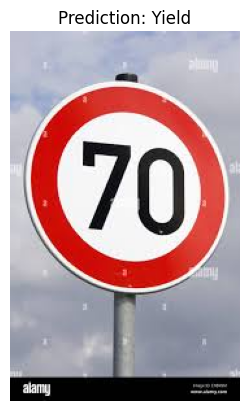

In [1]:
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load your saved model (adjust filename/path if needed)
model = load_model('traffic_sign_cnn_model.h5')

# Map class indices to names (update this dict with your full labels)
idx_to_class = {
0: 'Speed Limit (20 km/h)',
    1: 'Speed Limit (30 km/h)',
    2: 'No Passing for Vehicles Over 3.5 Metric Tons',
    3:  'Right-Of-Way at the next intersection',
    4: 'Priority Road',
    5: 'Yield',
    6: 'Stop',
    7: 'No Vehicles',
    8: 'Vehicles Over 3.5 Metric Tons Prohibited',
    9: 'No Entry',
    10: 'General Caution',
    11: 'Dangerous Curve To the Left',
    12: 'Speed Limit (50 km/h)',
    13: 'Dangerous Curve To the Right',
    14: 'Double Curve',
    15: 'Bumpy Road',
    16: 'Slippery Road',
    17: 'Road Narrows On The Right',
    18 : 'Road Work',
    19:  'Traffic Signals',
    20: 'Pedestrians',
    21 : 'Children Crossing',
    22:  'Bicycles Crossing',
    23: 'Speed Limit (60 km/h)',
    24: 'Beware of Ice/Snow',
    25: 'Wild Animals Crossing',
    26: 'End of All Speed and Passing Limits',
    27: 'Turn Right Ahead',
    28: 'Turn Left Ahead',
    29: 'Ahead Only',
    30:'Go Straight Or Right',
    31: 'Go Straight Or Left',
    32: 'Keep Right',
    33: 'Keep Left',
    34:'Speed Limit (70 km/h)',
    35: 'Roundabout Mandatory',
    36: 'End Of No Passing',
    37: 'End Of No Passing by Vehicles over 3.5 Metric Tons',
    38: 'Speed Limit (80 km/h)',
    39: 'End of Speed Limit (80 km/h)',
    40: 'Speed Limit (100 km/h)',
    41:  'Speed Limit (120 km/h)',
    42: 'No Passing',

}
IMG_SIZE = (64, 64)  # model input size

def preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img = img.resize(IMG_SIZE)
    img_array = np.array(img) / 255.0

    print(f"Image shape after resize: {img.size}")  # should be (64, 64)
    print(f"Image array shape: {img_array.shape}")  # should be (64,64,3)
    print(f"Pixel value range: min={img_array.min()}, max={img_array.max()}")

    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
    print(f"Shape after adding batch dimension: {img_array.shape}")  # (1,64,64,3)

    return img_array
# Upload image from local device
uploaded = files.upload()

for fn in uploaded.keys():
    print(f'User uploaded file "{fn}"')

    # Preprocess and predict
    img_array = preprocess_image(fn)
    pred_probs = model.predict(img_array)
    pred_class = np.argmax(pred_probs, axis=1)[0]
    pred_name = idx_to_class.get(pred_class, "Unknown")

    # Display image
    img = Image.open(fn)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: {pred_name}')
    plt.show()
